In [13]:
#import files and necessary libraries
import GB_Approach
import NN_Approach
import Stacked_Approach
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Function to calculate median and IQR
def calculate_median_iqr(errors):
    median = np.median(errors)
    q1 = np.percentile(errors, 25)
    q3 = np.percentile(errors, 75)
    iqr = q3 - q1
    return median, iqr

In [2]:
#data from fullpipeline (data more consistent)

# Define the array of numbers
gb_rmse_scores = np.array([20043.46678173, 23863.77020546, 21318.58258771, 28592.3551316, 23019.45820193])

# Define the duration for the Gradient Boosting evaluation
gb_duration = datetime.timedelta(minutes=0, seconds=43, microseconds=216616)

Text(0.5, 1.0, 'GB Log Prediction Error by Actual Price')

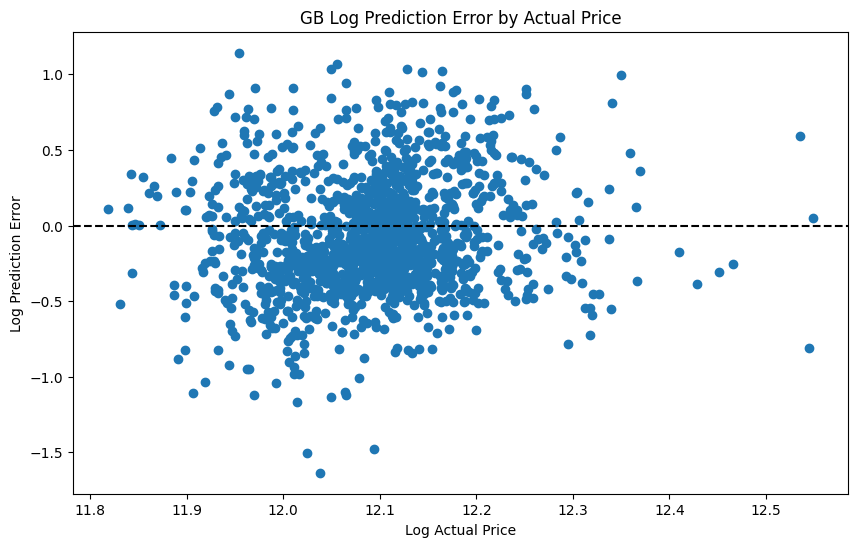

In [19]:
#Plot Log Prediction Error by Actual Price for Gradient Boosting
gb_df = pd.read_csv(GB_Approach.PREDICTIONS_GB_FILE_PATH)
sample_df = pd.read_csv(GB_Approach.SAMPLE_SUBMISSION_FILE_PATH)

# Calculate errors in log scale GB
gb_df.sort_values('Id', inplace=True)
sample_df.sort_values('Id', inplace=True)
log_gb = np.log1p(gb_df['SalePrice'] + 1)
log_actual = np.log1p(sample_df['SalePrice'] + 1)
log_errors_gb = log_gb - log_actual

#Plotting the errors Gb
plt.figure(figsize=(10, 6))
plt.scatter(log_actual, log_errors_gb)
plt.axhline(0, color='black', linestyle='--')
plt.xlabel('Log Actual Price')
plt.ylabel('Log Prediction Error')
plt.title('GB Log Prediction Error by Actual Price')

In [6]:
#data from running pipeline (data more consistent)

# Define the array of numbers
nn_rmse_scores = np.array([25751.74855413, 22174.6998479, 22173.75438609, 27873.01484767, 24598.37333298])

#nn duration
nn_duration = datetime.timedelta(hours=0, minutes=10, seconds=56, microseconds=282130)

Text(0.5, 1.0, 'NN Log Prediction Error by Actual Price')

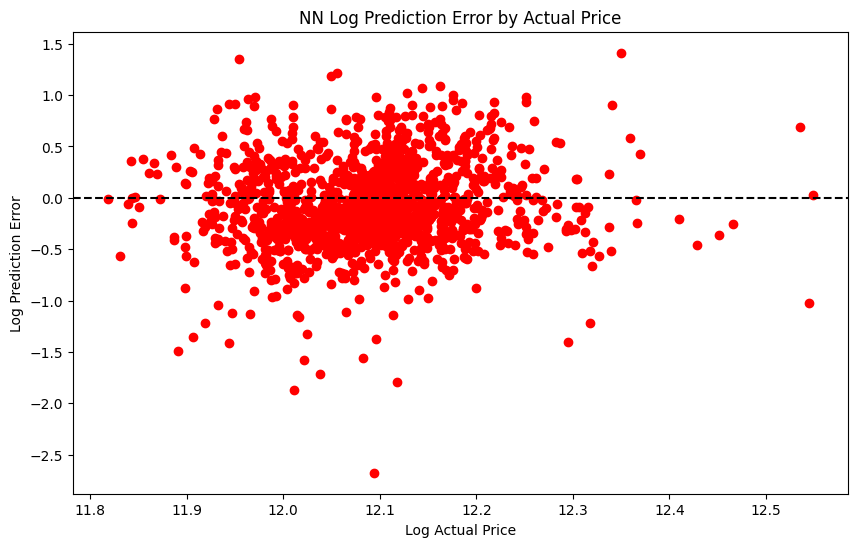

In [7]:
#plot the Log Prediction Error by Actual Price for Neural Network
nn_df = pd.read_csv(NN_Approach.PREDICTIONS_NN_FILE_PATH)

# Calculate errors in log scale NN
nn_df.sort_values('Id', inplace=True)
log_nn = np.log1p(nn_df['SalePrice'] + 1)
log_errors_nn = log_nn - log_actual

#Plotting the errors NN
plt.figure(figsize=(10, 6))
plt.scatter(log_actual, log_errors_nn, color = 'red')
plt.axhline(0, color='black', linestyle='--')
plt.xlabel('Log Actual Price')
plt.ylabel('Log Prediction Error')
plt.title('NN Log Prediction Error by Actual Price')

In [21]:
#data from running pipeline (data more consistent)
stacked_rmse_scores = np.array([21393.8165989, 21879.85806529, 20683.99232721, 26163.71675458, 21415.55703462])
stacked_duration = datetime.timedelta(hours=0, minutes=56, seconds=7, microseconds=341114)

Text(0.5, 1.0, 'Stacked Log Prediction Error by Actual Price')

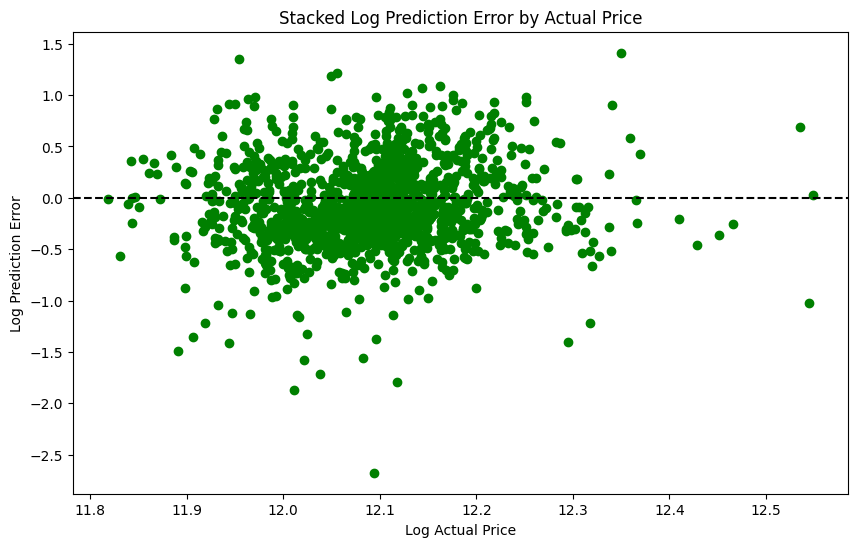

In [22]:
#plot the log prediction error for stacked model
stacked_df = pd.read_csv(Stacked_Approach.PREDICTIONS_STACKED_FILE_PATH)

#Calculate errors in log scale stacked
stacked_df.sort_values('Id', inplace=True)
log_stacked = np.log1p(stacked_df['SalePrice'] + 1)
log_errors_stacked = log_stacked - log_actual

#Plotting the errors NN
plt.figure(figsize=(10, 6))
plt.scatter(log_actual, log_errors_nn, color = 'green')
plt.axhline(0, color='black', linestyle='--')
plt.xlabel('Log Actual Price')
plt.ylabel('Log Prediction Error')
plt.title('Stacked Log Prediction Error by Actual Price')

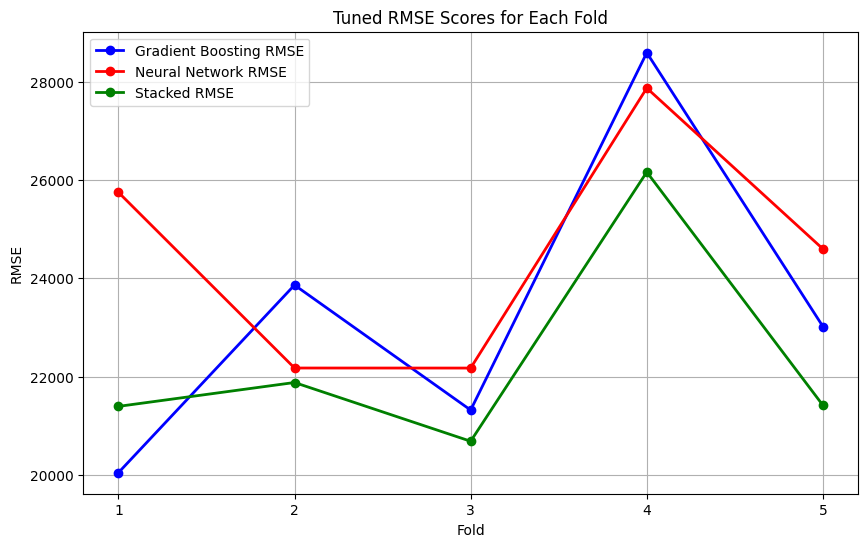

In [23]:
#plot the RMSE scores of all models for comparisons
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(gb_rmse_scores) + 1), gb_rmse_scores, color='blue', marker='o', linestyle='-', linewidth=2, markersize=6, label='Gradient Boosting RMSE')
plt.plot(range(1, len(nn_rmse_scores) + 1), nn_rmse_scores, color='red', marker='o', linestyle='-', linewidth=2, markersize=6, label='Neural Network RMSE')
plt.plot(range(1, len(stacked_rmse_scores) + 1), stacked_rmse_scores, color='green', marker='o', linestyle='-', linewidth=2, markersize=6, label='Stacked RMSE')
plt.xlabel('Fold')
plt.ylabel('RMSE')
plt.title('Tuned RMSE Scores for Each Fold')
plt.grid(True)
plt.xticks(range(1, len(gb_rmse_scores) + 1))
plt.legend()

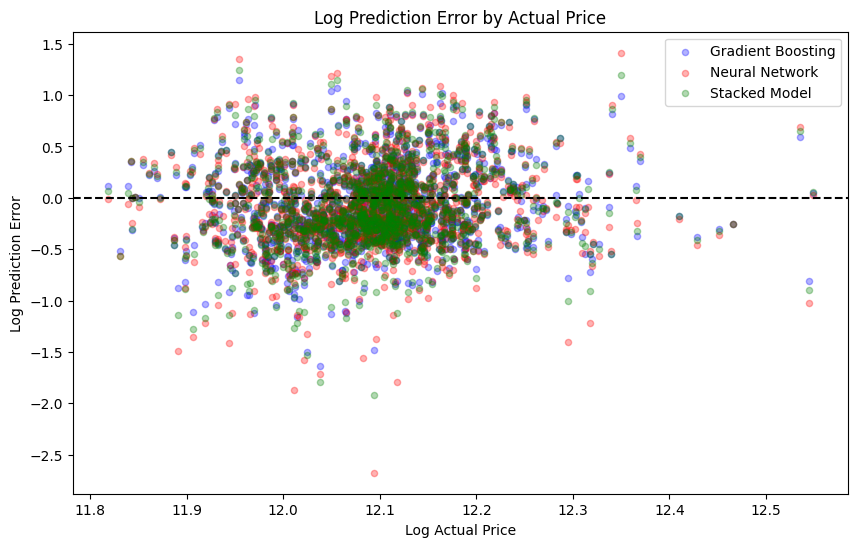

In [9]:
#plotting Combined errors
plt.figure(figsize=(10, 6))
plt.scatter(log_actual, log_errors_gb, color='blue', alpha=0.3, s=20, label='Gradient Boosting')
plt.scatter(log_actual, log_errors_nn, color='red', alpha=0.3, s=20, label='Neural Network')
plt.scatter(log_actual, log_errors_stacked, color='green', alpha=0.3, s=20, label='Stacked Model')
plt.axhline(0, color='black', linestyle='--')
plt.xlabel('Log Actual Price')
plt.ylabel('Log Prediction Error')
plt.title('Log Prediction Error by Actual Price')
plt.legend()

In [10]:

# Combine errors into a single DataFrame for easier plotting
data = {
    'Log Actual Price': np.concatenate([log_actual, log_actual, log_actual]),
    'Log Prediction Error': np.concatenate([log_errors_gb, log_errors_nn, log_errors_stacked]),
    'Model': ['Gradient Boosting'] * len(log_errors_gb) + ['Neural Network'] * len(log_errors_nn) + ['Stacked Model'] * len(log_errors_stacked)
}
df = pd.DataFrame(data)

#get median and IQR for each model
median_gb, iqr_gb = calculate_median_iqr(log_errors_gb)
median_nn, iqr_nn = calculate_median_iqr(log_errors_nn)
median_stacked, iqr_stacked = calculate_median_iqr(log_errors_stacked)

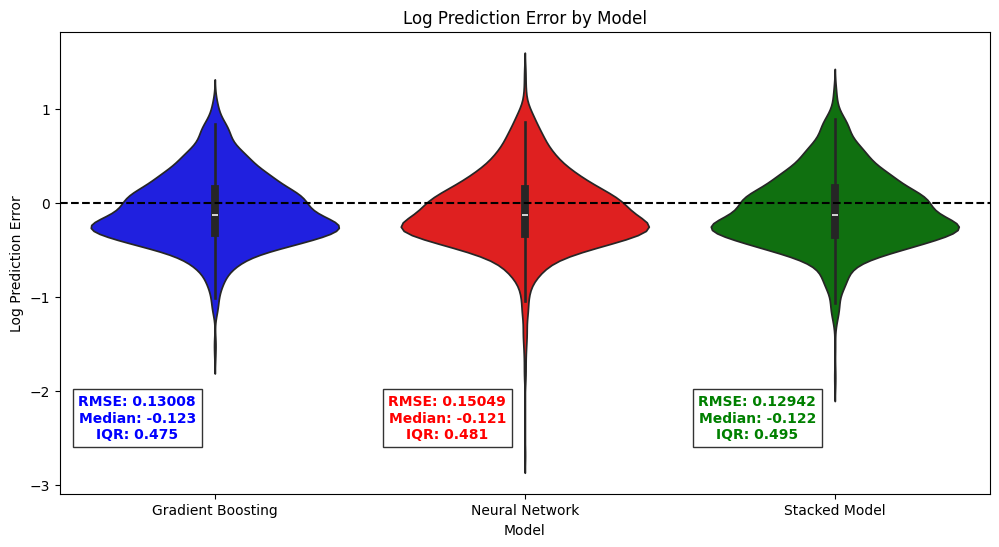

In [20]:
# Calculate metrics for each model
metrics = {
    'Gradient Boosting': {'RMSE': 0.13008, 'Median': median_gb, 'IQR': iqr_gb},
    'Neural Network': {'RMSE': 0.15049, 'Median': median_nn, 'IQR': iqr_nn},
    'Stacked Model': {'RMSE': 0.12942, 'Median': median_stacked, 'IQR': iqr_stacked}
}

# Define the color palette
palette = {'Gradient Boosting': 'blue', 'Neural Network': 'red', 'Stacked Model': 'green'}
# Plot violin plots
plt.figure(figsize=(12, 6))
sns.violinplot(x='Model', y='Log Prediction Error', data=df, hue='Model', palette=palette, legend=False)
plt.axhline(0, color='black', linestyle='--')
plt.title('Log Prediction Error by Model')
# Annotate the plot with RMSE, Median, and IQR
for i, model in enumerate(['Gradient Boosting', 'Neural Network', 'Stacked Model']):
    plt.text(i - 0.25, -2.5,  # Adjust the second value to position the text higher
             f"RMSE: {metrics[model]['RMSE']:.5f}\nMedian: {metrics[model]['Median']:.3f}\nIQR: {metrics[model]['IQR']:.3f}", 
             horizontalalignment='center', size='medium', color=palette[model], weight='semibold', bbox=dict(facecolor='white', alpha=0.8))


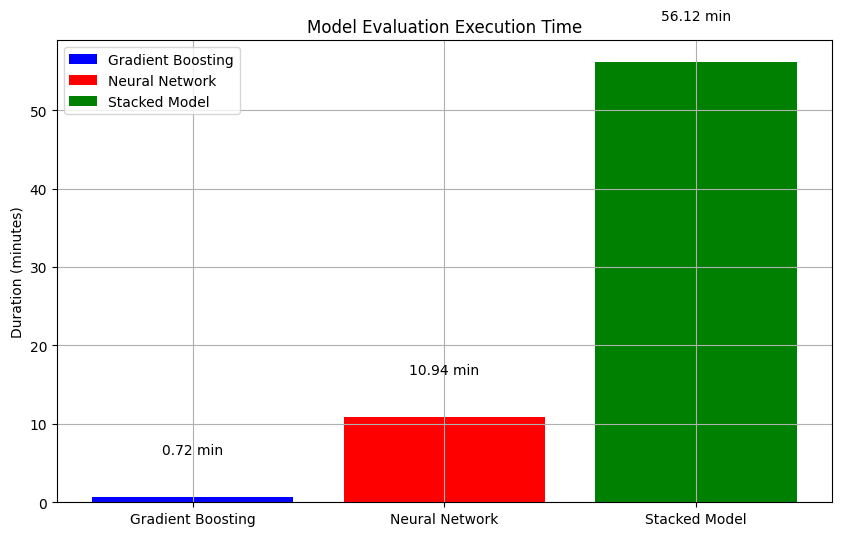

In [24]:
#compare duration of each model
durations = {
    'Gradient Boosting': gb_duration,
    'Neural Network': nn_duration,
    'Stacked Model': stacked_duration
}

# Convert durations to minutes
durations_in_minutes = [duration.total_seconds() / 60 for duration in durations.values()]

# Plot the durations with labels
plt.figure(figsize=(10, 6))
bars = plt.bar(durations.keys(), durations_in_minutes, color=['blue', 'red', 'green'])

# Add labels and title
plt.ylabel('Duration (minutes)')
plt.title('Model Evaluation Execution Time')
plt.grid(True)

# Add a legend
plt.legend(bars, ['Gradient Boosting', 'Neural Network', 'Stacked Model'])

# Display the duration values on top of each bar
for i, duration in enumerate(durations_in_minutes):
    plt.text(i, duration + 5, f'{duration:.2f} min', ha='center', va='bottom')


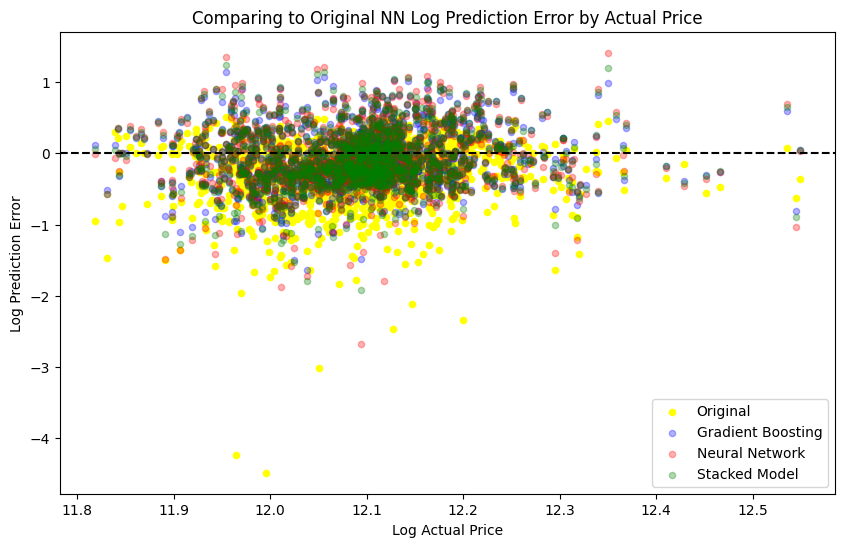

In [29]:
#comparing log error to original log error predictions

og_df = pd.read_csv('og_predictions.csv')

# Calculate errors in log scale
og_df.sort_values('Id', inplace=True)
log_og = np.log1p(og_df['SalePrice'] + 1)
log_errors_og = log_og - log_actual

#plot graph with original log errors versus all three models
plt.figure(figsize=(10, 6))
plt.scatter(log_actual, log_errors_og, color='yellow', s=20, label='Original')
plt.scatter(log_actual, log_errors_gb, color='blue', alpha=0.3, s=20, label='Gradient Boosting')
plt.scatter(log_actual, log_errors_nn, color='red', alpha=0.3, s=20, label='Neural Network')
plt.scatter(log_actual, log_errors_stacked, color='green', alpha=0.3, s=20, label='Stacked Model')
plt.axhline(0, color='black', linestyle='--')
plt.xlabel('Log Actual Price')
plt.ylabel('Log Prediction Error')
plt.title('Comparing to Original NN Log Prediction Error by Actual Price')
plt.legend()


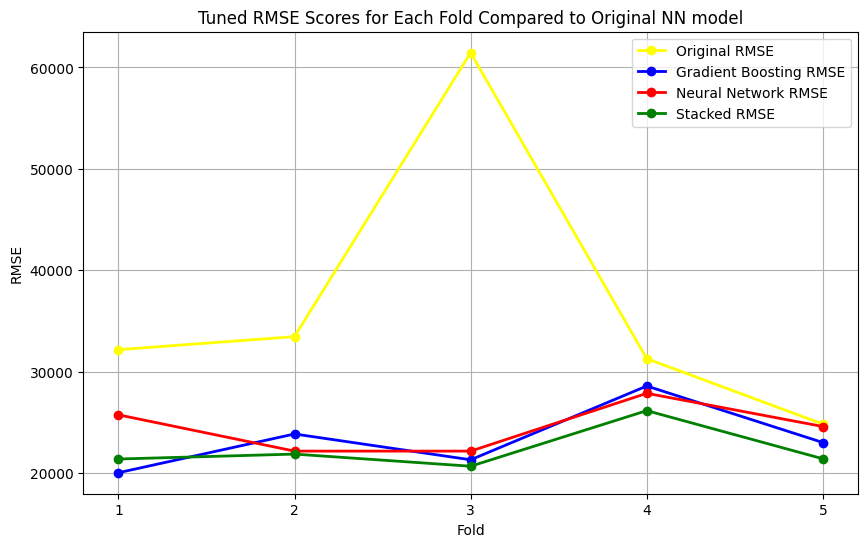

In [30]:
#Compare to original rmse scores

og_rmse_scores = og_rmse_scores = np.array([32172.9301224, 33462.16289029, 61450.92029345, 31284.91229929, 24833.76276855])

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(og_rmse_scores) + 1), og_rmse_scores, color='yellow', marker='o', linestyle='-', linewidth=2, markersize=6, label='Original RMSE')
plt.plot(range(1, len(gb_rmse_scores) + 1), gb_rmse_scores, color='blue', marker='o', linestyle='-', linewidth=2, markersize=6, label='Gradient Boosting RMSE')
plt.plot(range(1, len(nn_rmse_scores) + 1), nn_rmse_scores, color='red', marker='o', linestyle='-', linewidth=2, markersize=6, label='Neural Network RMSE')
plt.plot(range(1, len(stacked_rmse_scores) + 1), stacked_rmse_scores, color='green', marker='o', linestyle='-', linewidth=2, markersize=6, label='Stacked RMSE')
plt.xlabel('Fold')
plt.ylabel('RMSE')
plt.title('Tuned RMSE Scores for Each Fold Compared to Original NN model')
plt.grid(True)
plt.xticks(range(1, len(gb_rmse_scores) + 1))
plt.legend()